# Data Incubator Project Proposal: 
## Understanding users and products using the Stack Exchange network
<img src="stackexchange_image.png">


## Introduction

The Stack Exchange (SE) network is a collection of Q&A websites where enthusiast and experts come together to share their knowledge. Currently the SE network is one of the top 50 online sites with approximately 838 million views per month [1]. The network encompasses a wide variety of subjects ranging from home improvement to computer programming. 

## Project goal

The goal of this project is to identify important computer topics and the characteristics of users who ask/answer questions. This project is based around the SE site superuser.com but will analyze all of the data collected from the SE network. In this project proposal, we answer two questions:
- What are some of their characteristics of users who provide most answers on superuser.com?
- What are some of the most troublesome computer topics? How are they different between different software and hardware combinations?

Using the data from the SE network, we find some unexpected results that merits further investigation.

## Broader impact

Forums and Q&A websites like Stack Exchange are one of the best places to ask questions and resolve problems quickly. In this project we analyze superuser.com but similar analyses can be conducted for other subjects. For example, an analysis of gaming.stackexchange.com could provide insights into desired games. In general, we can use the SE network to identify product issues, future products, or the characteristics of users. 

[1]: Statistics reported at https://stackexchange.com/about

## Stack Exchange Data

The Stack Exchange network provides access to their website data at the [Stack Exchange Data Dump](https://archive.org/details/stackexchange). Currently there is over 60GBs of data available on users, posts, comments etc. Here we consider the user and post data from superuser.com and supplement the analysis with user data from a few select SE sites. 

- There are 1,038,245 superuser.com posts with 20 features such as title, tags, view count, and score.
- There are 803,552 users on superuser.com with 12 features such as reputation, upvotes, downvotes, etc.

In the final project, we will incorporate data from all SE sites.

## Data analysis:
Start data analysis by loading libraries, importing data, and cleaning data.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load superuser.com post and user data
posts_superuser = pd.read_csv('posts_superuser.csv')
users_superuser = pd.read_csv('users_superuser.csv')

# Load user data from other SE sites
users_android = pd.read_csv('users_android.csv')
users_apple = pd.read_csv('users_apple.csv')
users_bicycles = pd.read_csv('users_bicycles.csv')
users_english = pd.read_csv('users_english.csv')
users_math = pd.read_csv('users_math.csv')
users_movies = pd.read_csv('users_movies.csv')
users_music = pd.read_csv('users_music.csv')
users_outdoors = pd.read_csv('users_outdoors.csv')
users_physics = pd.read_csv('users_physics.csv')

print('Data loaded')

Data loaded


In [3]:
# Clean superuser data and make sure that all columns have the correct data type
posts_superuser.fillna(-1,inplace = True)
posts_superuser[['LastEditDate','LastActivityDate','CommunityOwnedDate','ClosedDate','CreationDate']] = posts_superuser[['LastEditDate','LastActivityDate','CommunityOwnedDate','ClosedDate','CreationDate']].apply(pd.to_datetime)
posts_superuser[['AnswerCount','FavoriteCount','ParentID','AcceptedAnswerId','ViewCount','OwnerUserId','LastEditorUserId']] = posts_superuser[['AnswerCount','FavoriteCount','ParentID','AcceptedAnswerId','ViewCount','OwnerUserId','LastEditorUserId']].astype(int)

print('Finished cleaning data')

Finished cleaning data


## Question 1:
What are some of their characteristics of users who provide most answers on superuser.com?

There are a variety of possible features that describe users who post answers. Here we look at whether these users are members of other SE sites to identify what subjects they are interested in.

In [4]:
# find all answer posts 
posts_accepted_ans = posts_superuser[posts_superuser.PostTypeId == 2]
# find the superuser userids with accepted answers and the number of accepted answers
tmp = posts_accepted_ans.groupby(['OwnerUserId'])['OwnerUserId'].count().sort_values(ascending=False)
users_with_answers = []
users_with_answers = pd.DataFrame({'Id':tmp.keys()[1:],
                     'AcceptedAnswerCount': tmp[1:]})
users_with_answers = users_with_answers.reset_index(drop=True)

# Find the stackexchange AccountId for users with accepted answers
users_with_answers = pd.merge(users_with_answers,users_superuser[['Id','AccountId']], on=['Id'], how='inner')

# Find out if users are members of other stackexchange sites
users_with_answers['AndroidUserYN'] = users_with_answers.AccountId.isin(users_android.AccountId).astype(int)
users_with_answers['AppleUserYN'] = users_with_answers.AccountId.isin(users_apple.AccountId).astype(int)
users_with_answers['BicyclesUserYN'] = users_with_answers.AccountId.isin(users_bicycles.AccountId).astype(int)
users_with_answers['EnglishUserYN'] = users_with_answers.AccountId.isin(users_english.AccountId).astype(int)
users_with_answers['MathUserYN'] = users_with_answers.AccountId.isin(users_math.AccountId).astype(int)
users_with_answers['MoviesUserYN'] = users_with_answers.AccountId.isin(users_movies.AccountId).astype(int)
users_with_answers['MusicUserYN'] = users_with_answers.AccountId.isin(users_music.AccountId).astype(int)
users_with_answers['OutdoorsUserYN'] = users_with_answers.AccountId.isin(users_outdoors.AccountId).astype(int)
users_with_answers['PhysicsUserYN'] = users_with_answers.AccountId.isin(users_physics.AccountId).astype(int)

users_with_answers['StackMemberCount'] = users_with_answers[['AndroidUserYN','AppleUserYN','BicyclesUserYN','EnglishUserYN','MathUserYN',
                   'MoviesUserYN','MusicUserYN','OutdoorsUserYN','PhysicsUserYN']].sum(axis = 1)

# find the most common stack sties among users with at least n number of answers
n_answers = 100
member_counts = users_with_answers[['AndroidUserYN','AppleUserYN','BicyclesUserYN','EnglishUserYN','MathUserYN',
                   'MoviesUserYN','MusicUserYN','OutdoorsUserYN','PhysicsUserYN']][users_with_answers.AcceptedAnswerCount >= n_answers].sum(axis = 0)

stack_sites = ['Android','Apple','Bicycles','English','Math','Movies','Music','Outdoors','Physics']

## Figure 1
Here we plot the number of superuser members on other SE sites. We find that:

- As one expects, users who are interested computers are also interested in other STEM subjects like Android, Apple, math, and physics
- Surprisingly, the most popular site is English SE which is not a STEM subject.

This surprising result merits further investigation but suggests a correlation between an interest in english and ones ability to answer computer related questions. 

Note: This data only represents users who have at least 100 answers on superuser.com


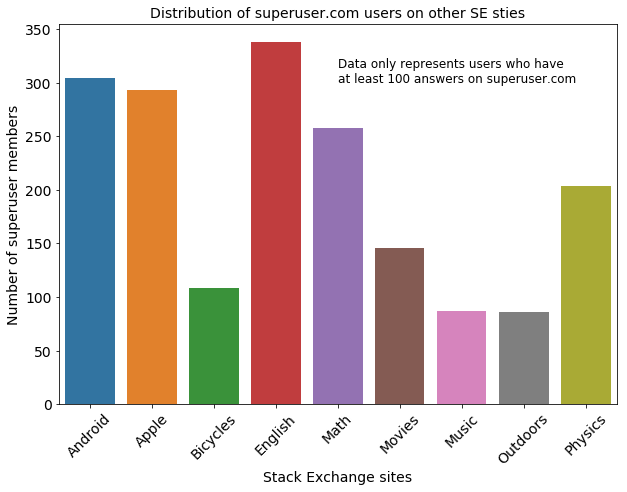

In [5]:
fig = plt.figure(figsize=(10,7))
ax = sns.barplot(x=stack_sites, y=member_counts)
plt.xlabel('Stack Exchange sites',fontsize = 14)
plt.ylabel('Number of superuser members',fontsize = 14)
plt.title('Distribution of superuser.com users on other SE sties',fontsize = 14)
plt.text(4, 300, 'Data only represents users who have\n at least 100 answers on superuser.com', ha='left', fontsize = 12, wrap=True)
ax.tick_params(axis = 'both', labelsize = 14)
plt.xticks(rotation=45)
plt.show()

fig.savefig('DI_figure1.png',bbox_inches = "tight")

## Question 2:
What are some of the most troublesome computer topics? How are they different between different software and hardware combinations?

To identify the most troublesome topics, we analyze the some of the most popular tags which appear on superuser.com. We compare all the possible combinations of various hardware and software tags to better understand how different system combinations perform.

In [6]:
# Select top software and hardware tags from superuser.com
software_tags = ['linux','ubuntu','windows','macos','google-chrome',
                 'virtualbox','firefox','ffmpeg','python','microsoft-office']
hardware_tags = ['hard-drive','router','usb','laptop','memory','cpu','ssd','keyboard','graphics-card','display']

# Filter superuser.com posts for questions only
posts_questions =  posts_superuser[posts_superuser.PostTypeId == 1]

In [7]:
# Count the number of times each hardware tag appears with each software tag
tag_combo_counts = pd.DataFrame(columns=['SoftwareTag','HardwareTag','Count'])

for i in range(len(software_tags)):
    software_string = '<' + software_tags[i] + '>'
    tmp = []
    # get question posts that contain software string
    tmp = posts_questions[posts_questions.Tags.str.contains(software_string,na = False)]
    tag_count = [-1]*len(software_tags)
    for j in range(len(hardware_tags)):
        hardware_string = '<' + hardware_tags[j] + '>'
        tag_count[j] = (tmp.Tags.str.count(hardware_string)).sum() 
        
    tmp_df = pd.DataFrame({'SoftwareTag': [software_tags[i]]*len(hardware_tags),
                          'HardwareTag': hardware_tags,
                          'Count': tag_count})
    tag_combo_counts = pd.concat([tag_combo_counts,tmp_df])
    
tag_combo_counts.Count = pd.to_numeric(tag_combo_counts.Count)
tag_combo_counts.fillna(0,inplace = True)

# Scale the tag counts using ln(count+1) because counts differ by several orders of magnitude
tag_combo_counts.Count = np.log1p(tag_combo_counts.Count)
tag_combo_pivot = tag_combo_counts.pivot(index = 'HardwareTag',columns = 'SoftwareTag',values='Count')

# Set order of columns to make figure more understandable
column_order = ['linux','ubuntu','windows','macos','virtualbox',
                'google-chrome','firefox','ffmpeg','python','microsoft-office']

tag_combo_pivot = tag_combo_pivot.reindex_axis(column_order,axis = 1)

## Figure 2

Here we plot the frequency score of different hardware and software tag combinations where a higher score represents a higher number of posts. Based on this figure, we find that:
- MacOS has fewer questions related to graphics cards despite the fact that all operating systems have a comparable score with respect to displays.
- This suggests that MacOS handles the interface between operating system in graphics cards well and that Windows and Ubuntu could improve in this area.
- Among applications and programs like google chrome, it appears that memory is the primary concern for users.

The tag frequency score is defined as score = ln(count+1) and is normalized in this way to account for the vastly different number of posts between the various tag combinations.

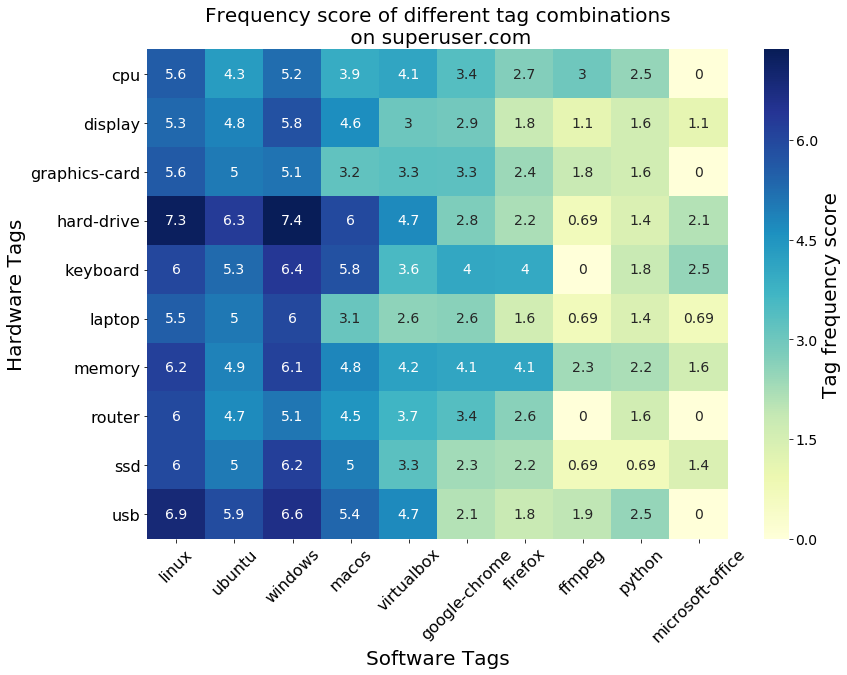

In [8]:
fig, ax = plt.subplots(figsize=(13,9))
sns.heatmap(tag_combo_pivot,annot=True,cmap="YlGnBu",ax = ax,
            annot_kws={"size": 14},cbar_kws={'label': 'Tag frequency score'})
ax.figure.axes[-1].yaxis.label.set_size(20)
ax.figure.axes[-1].tick_params(axis = 'both', labelsize = 14)
ax.tick_params(axis = 'both', labelsize = 16)
plt.xticks(rotation=45)
plt.xlabel('Software Tags',fontsize = 20)
plt.ylabel('Hardware Tags',fontsize = 20)
plt.title('Frequency score of different tag combinations\n on superuser.com',fontsize = 20)
plt.show()

fig.savefig('DI_figure2.png',bbox_inches = "tight")

## Future work

In this project proposal we have demonstrated how SE network data can be used to identify characterics of problem solvers and compare product performance. At the Data Incubator, I will analyze all of the SE data with the following goals. 

- Identify features of users who post answers that are accepted by the SE community
    - Some potential features to investigate include: readability of answers, interests in english or other topics, number of posts, number of questions asked (suggesting that user is an avid learner)
- Use machine learning (e.g. decision trees) to predict which users can answer questions regarding computers (superuser.com), math (math.stackexchange.com), or any other topic
- Identify and predict topics that will be of interest in 2020 using tags, post titles, and words contained in posts.